In [1]:
import pandas as pd; pd.set_option('display.max_columns', None)
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#this df includes fantasty points based on standard (no PPR)
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2020.csv')
df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Derrick Henry,TEN,RB,26,16,16,31,19,0,0,0,2027,17,378,114,0,314.0,0,3,2
1,Alvin Kamara,NOR,RB,25,15,10,107,83,0,0,0,932,16,187,756,5,295.0,0,1,0
2,Dalvin Cook,MIN,RB,25,14,14,54,44,0,0,0,1557,16,312,361,1,294.0,0,5,3
3,Travis Kelce,KAN,TE,31,15,15,145,105,4,0,2,0,0,0,1416,11,208.0,0,1,1
4,Davante Adams,GNB,WR,28,14,14,149,115,0,0,0,0,0,0,1374,18,243.0,0,1,1


In [3]:
df.shape

(626, 20)

In [4]:
pd.set_option('chained_assignment', None) # we don't care about overriding the original df

#running backs dataframe
rb_df = df.loc[df['Pos'] == 'RB']

# Usage is defined as Tgt + RushingAtt
rb_df['Usage/G'] = (rb_df['Tgt'] + rb_df['RushingAtt']) / rb_df['G'] 
rb_df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost,Usage/G
0,Derrick Henry,TEN,RB,26,16,16,31,19,0,0,0,2027,17,378,114,0,314.0,0,3,2,25.562500
1,Alvin Kamara,NOR,RB,25,15,10,107,83,0,0,0,932,16,187,756,5,295.0,0,1,0,19.600000
2,Dalvin Cook,MIN,RB,25,14,14,54,44,0,0,0,1557,16,312,361,1,294.0,0,5,3,26.142857
11,Jonathan Taylor,IND,RB,21,15,13,39,36,0,0,0,1169,11,232,299,1,217.0,0,1,1,18.066667
12,Aaron Jones,GNB,RB,26,14,14,63,47,0,0,0,1104,9,201,355,2,212.0,0,2,0,18.857143


In [5]:
#values for fantasy football purposes
fantasy_scoring_weights = {
    'RushingYds': 0.1,
    'ReceivingYds': 0.1,
    'ReceivingTD': 6,
    'RushingTD': 6,
    'FumblesLost': -2,
    'Rec': 1 # adjust for PPR
}

def get_fantasy_points(row):
    
    g = row['G'] # access the G column
    fantasy_points = sum([row[column]*weight for column, weight in fantasy_scoring_weights.items()])
    return fantasy_points / g

# create a FantasyPoints/G column
rb_df['FantasyPoints/G'] = rb_df.apply(get_fantasy_points, axis=1)

rb_df = rb_df[['Player', 'Tm', 'G', 'RushingAtt', 'Tgt'] + list(fantasy_scoring_weights.keys()) + ['Usage/G', 'FantasyPoints/G']]

rb_df.head()

,Player,Tm,G,RushingAtt,Tgt,RushingYds,ReceivingYds,ReceivingTD,RushingTD,FumblesLost,Rec,Usage/G,FantasyPoints/G
0,Derrick Henry,TEN,16,378,31,2027,114,0,17,2,19,25.562500,20.693750
1,Alvin Kamara,NOR,15,187,107,932,756,5,16,0,83,19.600000,25.186667
2,Dalvin Cook,MIN,14,312,54,1557,361,1,16,3,44,26.142857,23.700000
11,Jonathan Taylor,IND,15,232,39,1169,299,1,11,1,36,18.066667,16.853333
12,Aaron Jones,GNB,14,201,63,1104,355,2,9,0,47,18.857143,18.492857


C:\Users\Jaden\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Usage/G', ylabel='FantasyPoints/G'>

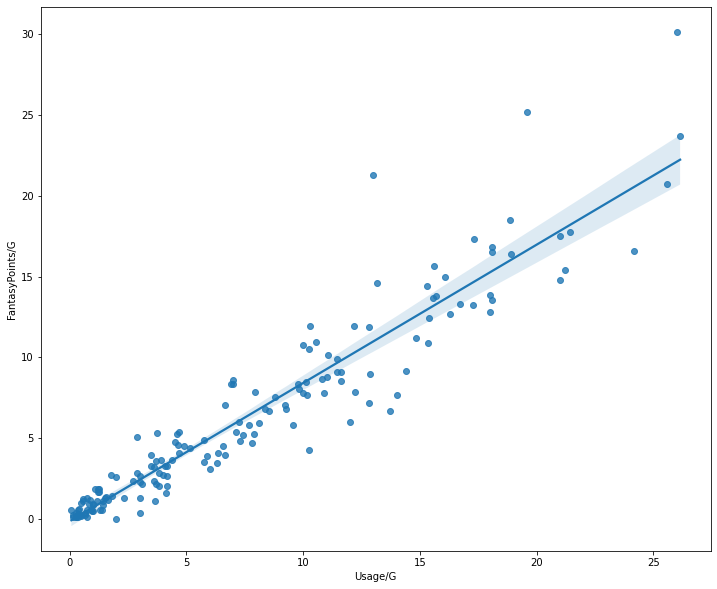

In [6]:
plt.figure(figsize=(12, 10))
sns.regplot(rb_df['Usage/G'], rb_df['FantasyPoints/G'])

C:\Users\Jaden\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of carries for RBs')]

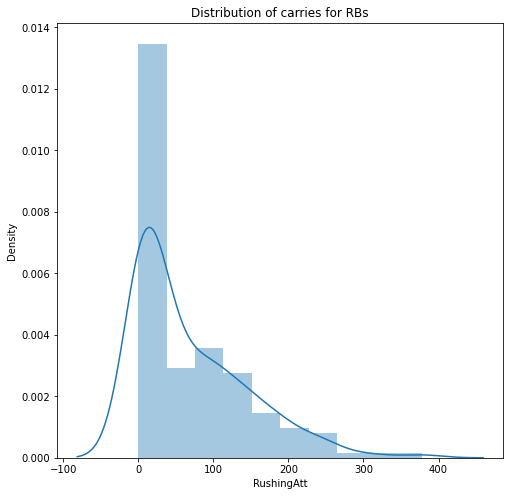

In [7]:
# distplot for RB rushing attempts
plt.figure(figsize=(8, 8))
sns.distplot(rb_df['RushingAtt']).set(title='Distribution of carries for RBs')

In [19]:
#lmplot for all positions from 2020 data
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2020.csv')
df_copy = df.copy(deep=True)

fantasy_scoring_weights = {
    'RushingYds': 0.1,
    'ReceivingYds': 0.1,
    'ReceivingTD': 6,
    'RushingTD': 6,
    'FumblesLost': -2,
    'PassingYds': 0.04,
    'PassingTD': 4,
    'Int': -2,
    'Rec': 1 # adjust for PPR
}

def get_fantasy_points(row):
    
    g = row['G'] # access the G column
    fantasy_points = sum([row[column]*weight for column, weight in fantasy_scoring_weights.items()])
    return fantasy_points / g

df_copy['Usage/Game'] = (df['PassingAtt'] + df['Tgt'] + df['RushingAtt'])/df['G']
df_copy['FantasyPoints/Game'] = df.apply(get_fantasy_points, axis=1)

In [28]:
palette ={"RB": "C0", "TE": "C3", "WR": "C2", "QB": "C1"}

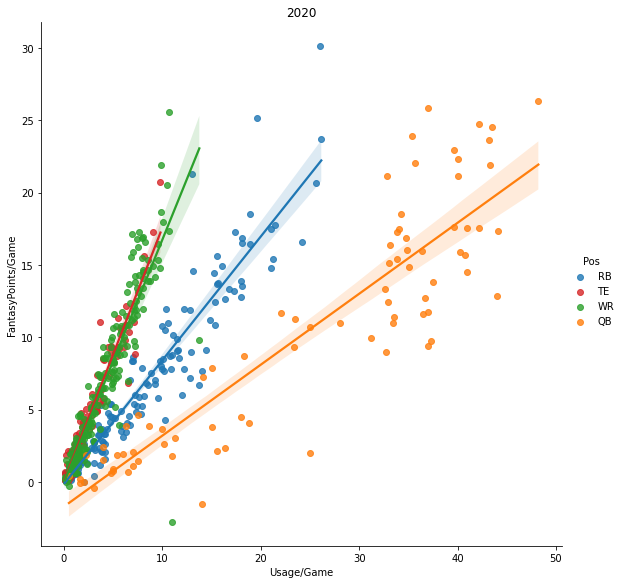

In [29]:
sns.lmplot(data=df_copy, x='Usage/Game', y='FantasyPoints/Game', hue='Pos', palette=palette, height = 8).set(title='2020')

In [11]:
#lmplot for all positions from 2019 data
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv').iloc[:, 1:]
df_copy = df.copy(deep=True)

fantasy_scoring_weights = {
    'RushingYds': 0.1,
    'ReceivingYds': 0.1,
    'ReceivingTD': 6,
    'RushingTD': 6,
    'FumblesLost': -2,
    'PassingYds': 0.04,
    'PassingTD': 4,
    'Int': -2,
    'Rec': 1 # adjust for PPR
}

def get_fantasy_points(row):
    
    g = row['G'] # access the G column
    fantasy_points = sum([row[column]*weight for column, weight in fantasy_scoring_weights.items()])
    return fantasy_points / g

df_copy['Usage/Game'] = (df['PassingAtt'] + df['Tgt'] + df['RushingAtt'])/df['G']
df_copy['FantasyPoints/Game'] = df.apply(get_fantasy_points, axis=1)

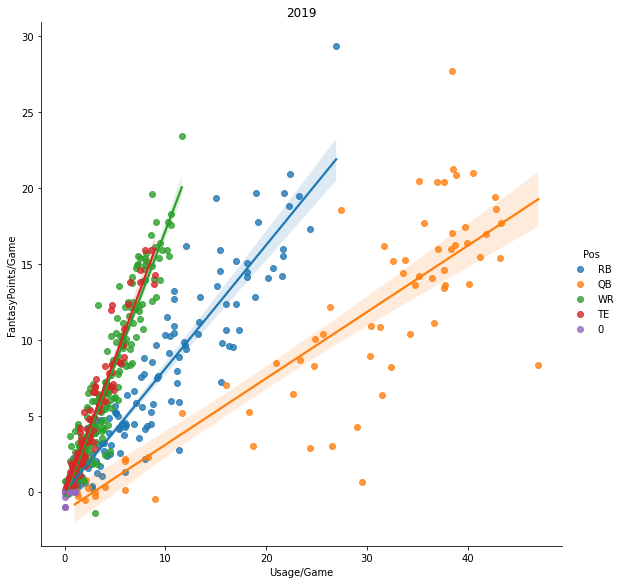

In [13]:
sns.lmplot(data=df_copy, x='Usage/Game', y='FantasyPoints/Game', hue='Pos', height = 8).set(title='2019')

In [31]:
df = pd.read_csv('NFL_Stats_2021.csv')
df.head(11)

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,FantPt,PPR▼,DKPt,FDPt,VBD,PosRank,OvRank
0,1,Cooper Kupp*+\KuppCo00,LAR,WR,28,17,17,0,1,0,0,0,4,18,4.50,0,191,145,1947,13.43,16,0,0,16,1.0,NaN,295,439.5,442.5,367.0,173.0,1,2.0
1,2,Josh Allen\AlleJo02,BUF,QB,25,17,17,409,646,4407,36,15,122,763,6.25,6,0,0,0,NaN,0,8,3,6,2.0,1.0,403,402.6,426.6,417.6,134.0,1,4.0
2,3,Justin Herbert*\HerbJu00,LAC,QB,23,17,17,443,672,5014,38,15,63,302,4.79,3,0,0,0,NaN,0,1,1,3,1.0,5.0,381,380.8,402.8,395.8,112.0,2,6.0
3,4,Tom Brady*\BradTo00,TAM,QB,44,17,17,485,719,5316,43,12,28,81,2.89,2,0,0,0,NaN,0,4,3,2,NaN,NaN,375,374.7,392.7,386.7,106.0,3,7.0
4,5,Jonathan Taylor*+\TaylJo02,IND,RB,22,17,17,0,0,0,0,0,332,1811,5.45,18,51,40,360,9.00,2,4,2,20,NaN,NaN,333,373.1,381.1,353.1,187.0,1,1.0
5,6,Patrick Mahomes*\MahoPa00,KAN,QB,26,17,17,436,658,4839,37,13,66,381,5.77,2,0,0,0,NaN,0,9,4,2,1.0,1.0,362,361.7,384.7,374.7,93.0,4,13.0
6,7,Davante Adams*+\AdamDa01,GNB,WR,29,16,16,0,0,0,0,0,0,0,NaN,0,169,123,1553,12.63,11,0,0,11,NaN,NaN,221,344.3,347.3,282.8,100.0,5,12.0
7,8,Austin Ekeler\EkelAu00,LAC,RB,26,16,16,0,0,0,0,0,206,911,4.42,12,94,70,647,9.24,8,4,3,20,2.0,NaN,274,343.8,352.8,308.8,128.0,2,5.0
8,9,Deebo Samuel*+\SamuDe00,SFO,WR,25,16,15,1,2,24,1,0,59,365,6.19,8,121,77,1405,18.25,6,4,2,14,NaN,NaN,262,339.0,347.0,300.5,140.0,2,3.0
9,10,Aaron Rodgers*+\RodgAa00,GNB,QB,38,16,16,366,531,4115,37,4,33,101,3.06,3,1,1,-4,-4.00,0,3,0,3,NaN,NaN,332,333.3,343.3,336.8,64.0,5,18.0


In [32]:
df_copy = df.copy(deep=True)
df_copy['Usage/Game'] = (df['Att'] + df['Att.1'] + df['Tgt'])/df['G']
df_copy['FantasyPoints/Game'] = df['PPR▼']/df['G']

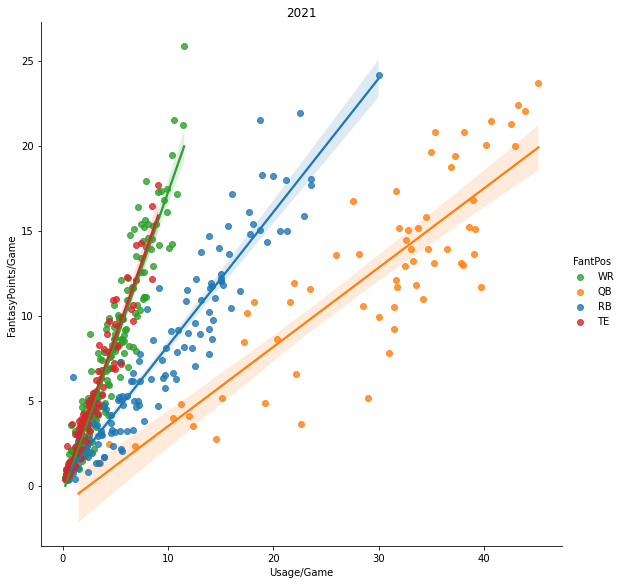

In [33]:
palette ={"RB": "C0", "TE": "C3", "WR": "C2", "QB": "C1"}
sns.lmplot(data=df_copy, x='Usage/Game', y='FantasyPoints/Game', hue='FantPos', palette=palette, height = 8).set(title='2021')